In [3]:
import pandas as pd
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt


In [9]:
data = pd.read_csv("Ecommerce Customers")
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [16]:
data.isna().sum()
data.isna().value_counts()
#data.isna().values.any()

Email  Address  Avatar  Avg. Session Length  Time on App  Time on Website  Length of Membership  Yearly Amount Spent
False  False    False   False                False        False            False                 False                  500
dtype: int64

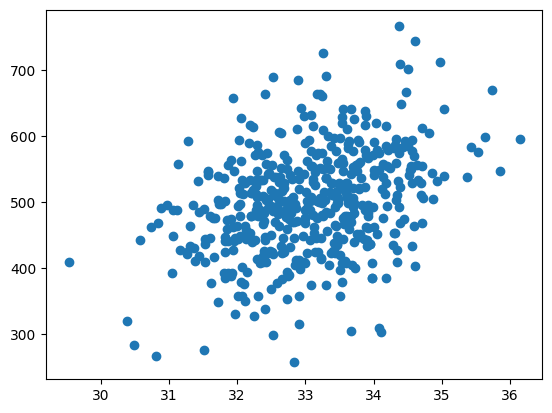

In [17]:
plt.scatter(data['Avg. Session Length'],data['Yearly Amount Spent'])
plt.show()

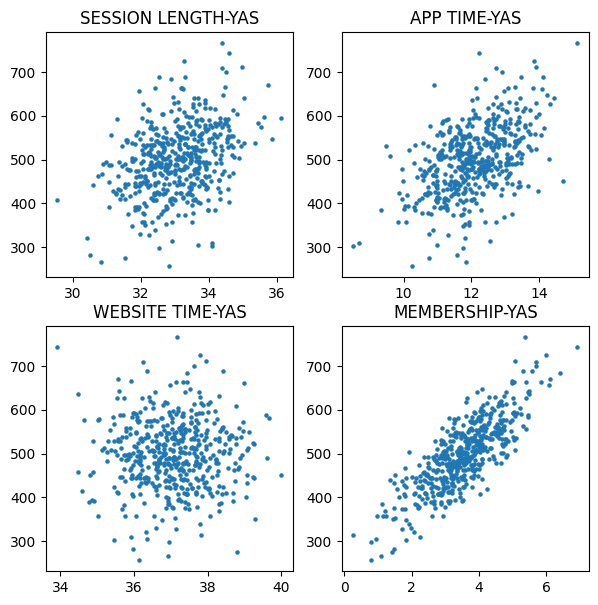

In [23]:
fig = plt.figure(figsize=(7,7))

first = fig.add_subplot(2,2,1)
first.scatter(data['Avg. Session Length'],data['Yearly Amount Spent'],s=5)
first.set_title("SESSION LENGTH-YAS")

second= fig.add_subplot(2,2,2)
second.scatter(data['Time on App'],data['Yearly Amount Spent'],s=5)
second.set_title("APP TIME-YAS")

third = fig.add_subplot(2,2,3)
third.scatter(data['Time on Website'],data['Yearly Amount Spent'],s=5)
third.set_title("WEBSITE TIME-YAS")

fourth = fig.add_subplot(2,2,4)
fourth.scatter(data['Length of Membership'],data['Yearly Amount Spent'],s=5)
fourth.set_title("MEMBERSHIP-YAS")

fig.show()



In [33]:
x = data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = data['Yearly Amount Spent']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.3,random_state=101)



In [44]:
data.corr()

<ipython-input-44-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


In [34]:
x_train.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
253,31.724203,13.172287,36.199753,3.557814
52,34.187775,10.320116,37.453405,2.094892
412,33.863189,11.523523,35.938045,3.013033
479,34.606242,11.761884,38.126520,1.820811
142,32.609283,10.537308,35.730552,3.914385


In [35]:
model = LinearRegression()

model.fit(x_train,y_train)

LinearRegression()

In [36]:
model.coef_

array([25.19773697, 38.72875147, -0.18193055, 61.50565074])

In [50]:
predicted = model.predict(x_test)

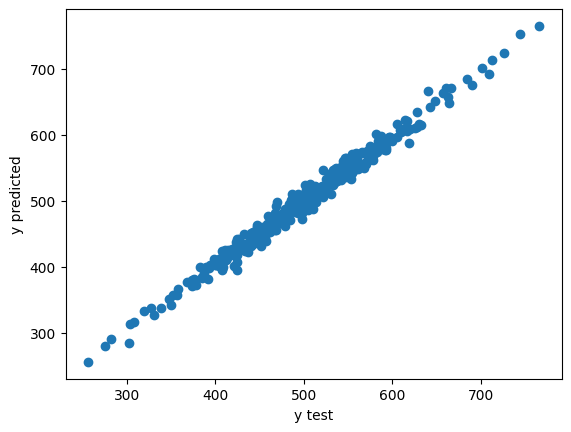

In [54]:
plt.scatter(y_test,predicted)
plt.xlabel("y test")
plt.ylabel("y predicted")
plt.show()

In [51]:
from sklearn import metrics
import numpy as np

print("Mean: ",y_test.mean())
print("MAE: ", metrics.mean_absolute_error(y_test,predicted))
print("MSE: ",metrics.mean_squared_error(y_test,predicted))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,predicted)))


Mean:  500.71011884486126
MAE:  7.64689711362161
MSE:  93.97077001588016
RMSE:  9.693852176296076


<function matplotlib.pyplot.show(close=None, block=None)>

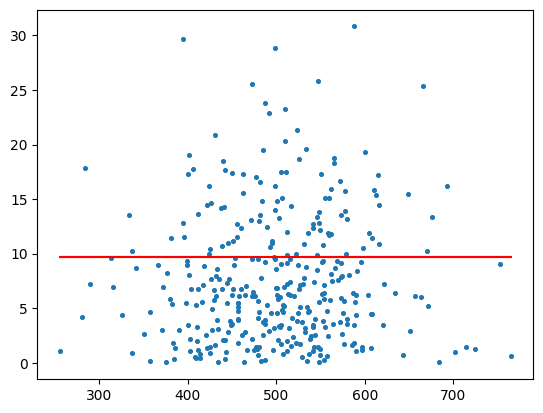

In [63]:
from sklearn import metrics
import numpy as np

error = np.sqrt((y_test-predicted)**2)
rmse = [np.sqrt(metrics.mean_squared_error(y_test,predicted))]*350

plt.scatter(predicted,error,s=7)
plt.plot(predicted,rmse,color="red")
plt.show